# Importing the libraries

In [1]:
import pandas as pd
import warnings
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
import warnings 
warnings.filterwarnings('ignore')
import plotly.express as px

In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)
warnings.filterwarnings('ignore')

# Loading the dataset

In [3]:
df=pd.read_csv('C:/Intel/Entities.csv')

In [4]:
df.shape

(168446, 18)

In [5]:
df.head()

,Unnamed: 0,property_id,location_id,page_url,property_type,price,location,city,province_name,latitude,longitude,baths,purpose,bedrooms,date_added,agency,agent,Total_Area
0,0,237062,3325,https://www.zameen.com/Property/g_10_g_10_2_gr...,Flat,10000000,G-10,Islamabad,Islamabad Capital,33.679890,73.012640,2,For Sale,2,2/4/2019,NaN,NaN,1089.004
1,1,346905,3236,https://www.zameen.com/Property/e_11_2_service...,Flat,6900000,E-11,Islamabad,Islamabad Capital,33.700993,72.971492,3,For Sale,3,5/4/2019,NaN,NaN,15246.056
2,2,386513,764,https://www.zameen.com/Property/islamabad_g_15...,House,16500000,G-15,Islamabad,Islamabad Capital,33.631486,72.926559,6,For Sale,5,7/17/2019,NaN,NaN,2178.008
3,3,656161,340,https://www.zameen.com/Property/islamabad_bani...,House,43500000,Bani Gala,Islamabad,Islamabad Capital,33.707573,73.151199,4,For Sale,4,4/5/2019,NaN,NaN,10890.000
4,4,841645,3226,https://www.zameen.com/Property/dha_valley_dha...,House,7000000,DHA Defence,Islamabad,Islamabad Capital,33.492591,73.301339,3,For Sale,3,7/10/2019,Easy Property,Muhammad Junaid Ceo Muhammad Shahid Director,2178.008


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168446 entries, 0 to 168445
Data columns (total 18 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Unnamed: 0     168446 non-null  int64  
 1   property_id    168446 non-null  int64  
 2   location_id    168446 non-null  int64  
 3   page_url       168446 non-null  object 
 4   property_type  168446 non-null  object 
 5   price          168446 non-null  int64  
 6   location       168446 non-null  object 
 7   city           168446 non-null  object 
 8   province_name  168446 non-null  object 
 9   latitude       168446 non-null  float64
 10  longitude      168446 non-null  float64
 11  baths          168446 non-null  int64  
 12  purpose        168446 non-null  object 
 13  bedrooms       168446 non-null  int64  
 14  date_added     168446 non-null  object 
 15  agency         124375 non-null  object 
 16  agent          124374 non-null  object 
 17  Total_Area     168446 non-nul

## Check the statistics of the data

In [5]:
df.describe()

,Unnamed: 0,property_id,location_id,price,latitude,longitude,baths,bedrooms,Total_Area
count,168446.000000,1.684460e+05,168446.000000,1.684460e+05,168446.000000,168446.000000,168446.000000,168446.000000,1.684460e+05
mean,84222.500000,1.559626e+07,4375.936395,1.776576e+07,29.859519,71.239804,2.874227,3.179422,1.394239e+04
std,48626.316059,2.251207e+06,3776.561581,3.531003e+07,3.807870,3.133042,2.463400,1.971401,8.623647e+05
min,0.000000,8.657500e+04,1.000000,0.000000e+00,11.052446,25.906027,0.000000,0.000000,0.000000e+00
25%,42111.250000,1.488320e+07,1058.000000,1.750000e+05,24.948536,67.130363,0.000000,2.000000,1.905757e+03
50%,84222.500000,1.665851e+07,3286.000000,8.500000e+06,31.459784,73.056182,3.000000,3.000000,4.356016e+03
75%,126333.750000,1.708662e+07,7220.000000,1.950000e+07,33.560887,73.259870,4.000000,4.000000,1.197904e+04
max,168445.000000,1.735772e+07,14220.000000,2.000000e+09,73.184088,80.161430,403.000000,68.000000,3.387988e+08


## Check the column the name of the dataset

In [8]:
df.columns

Index(['Unnamed: 0', 'property_id', 'location_id', 'page_url', 'property_type',
       'price', 'location', 'city', 'province_name', 'latitude', 'longitude',
       'baths', 'purpose', 'bedrooms', 'date_added', 'agency', 'agent',
       'Total_Area'],
      dtype='object')

### Unique values of the dataset

In [12]:
df.nunique()

Unnamed: 0       168446
property_id      168446
location_id        4198
page_url         168446
property_type         7
price              2077
location           1509
city                  5
province_name         3
latitude           7835
longitude          8308
baths                16
purpose               2
bedrooms             23
date_added          124
agency             5761
agent             10598
Total_Area          296
dtype: int64

In [10]:
df.property_type.unique()

array(['Flat', 'House', 'Penthouse', 'Farm House', 'Lower Portion',
       'Upper Portion', 'Room'], dtype=object)

In [13]:
df.city.unique()

array(['Islamabad', 'Lahore', 'Faisalabad', 'Rawalpindi', 'Karachi'],
      dtype=object)

In [12]:
df.baths.unique()

array([  2,   3,   6,   4,   8,   7,   5,   0,   1,  10,   9,  11,  13,
        12, 403,  14], dtype=int64)

In [13]:
df.purpose.unique()

array(['For Sale', 'For Rent'], dtype=object)

In [14]:
df.province_name.unique()

array(['Islamabad Capital', 'Punjab', 'Sindh'], dtype=object)

In [14]:
df.price.unique()

array([10000000,  6900000, 16500000, ...,  9010000,  1247000,   421000])

## Checking the null values in the dataset

In [15]:
df.isnull().sum()

Unnamed: 0           0
property_id          0
location_id          0
page_url             0
property_type        0
price                0
location             0
city                 0
province_name        0
latitude             0
longitude            0
baths                0
purpose              0
bedrooms             0
date_added           0
agency           44071
agent            44072
Total_Area           0
dtype: int64

In [16]:
# percentage of null values
(df.isnull().sum()/len(df))*100

Unnamed: 0        0.000000
property_id       0.000000
location_id       0.000000
page_url          0.000000
property_type     0.000000
price             0.000000
location          0.000000
city              0.000000
province_name     0.000000
latitude          0.000000
longitude         0.000000
baths             0.000000
purpose           0.000000
bedrooms          0.000000
date_added        0.000000
agency           26.163281
agent            26.163874
Total_Area        0.000000
dtype: float64

## Check the duplication of data

In [15]:
df.duplicated().sum()

np.int64(0)

### drop the irrelevent column that don't make sense for prediction

In [6]:
df.drop(columns=['Unnamed: 0','property_id','location_id','page_url','agency','agent','date_added'],inplace=True)

In [7]:
df.shape

(168446, 11)

In [8]:
df.duplicated().sum()

np.int64(53706)

### drop the dupllicated values

In [9]:
df.drop_duplicates(keep='first',inplace=True)

In [10]:
df.shape

(114740, 11)

### Checking the skewness of data

In [24]:
df.price.skew()

np.float64(9.611155265706405)

In [26]:
df.Total_Area.skew()

np.float64(303.6985909165194)

In [27]:
df.bedrooms.skew()

np.float64(0.837550504217357)

In [28]:
df.baths.skew()

np.float64(32.52155683626529)

## Outliers detection in `Price` column

<Axes: ylabel='price'>

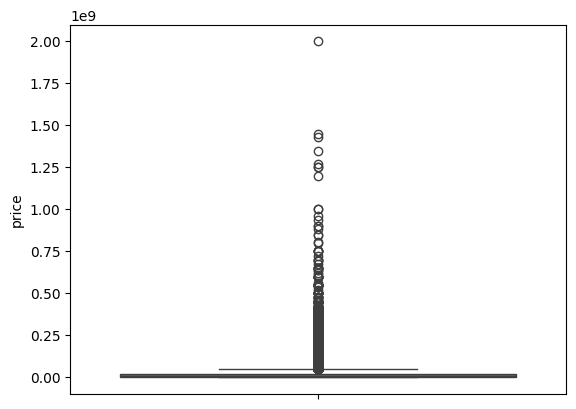

In [30]:
sns.boxplot(df['price'])

In [31]:
df['price'].shape

(114740,)

In [11]:
df['price'].describe()

count    1.147400e+05
mean     1.867737e+07
std      3.841888e+07
min      0.000000e+00
25%      1.900000e+05
50%      8.500000e+06
75%      2.000000e+07
max      2.000000e+09
Name: price, dtype: float64

In [12]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

190000.0
20000000.0
IQR is  19810000.0
upper limit  49715000.0
lower limit  -29525000.0
length of outliers on upper bound  9615
length of outliers on lower bound  0


### Applying trimming on outliers

In [13]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(105125, 11)


In [36]:
new_df['price'].skew()

np.float64(1.2790719215865376)

<Axes: ylabel='price'>

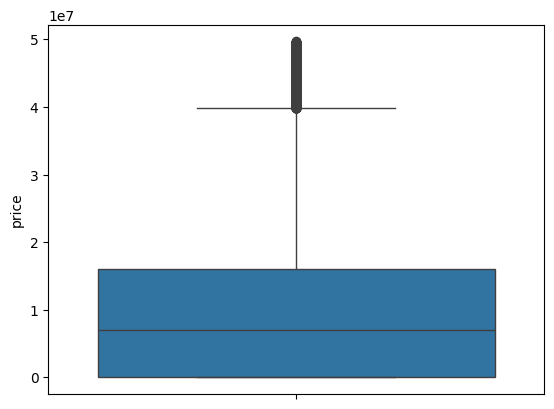

In [14]:
sns.boxplot(new_df['price'])

### Outliers removing and detection on `Total_Area`

(105125,)


<Axes: ylabel='Total_Area'>

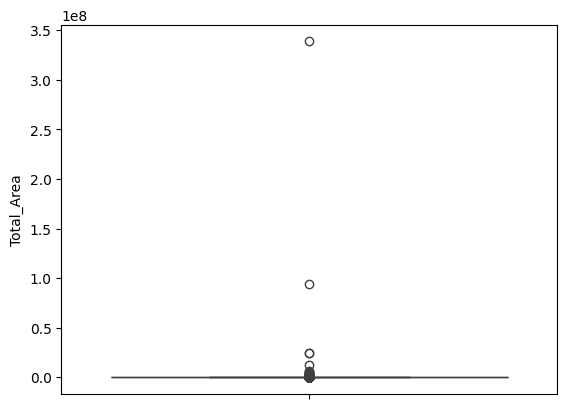

In [15]:
print(new_df['Total_Area'].shape)
sns.boxplot(new_df['Total_Area'])

In [16]:
# finding the IQR
q1 = new_df['Total_Area'].quantile(0.25)
q3 = new_df['Total_Area'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper_limit ',upper_limit)
print('lower_limit ',lower_limit)

outlier = new_df[new_df['Total_Area'] > upper_limit]
print("length of outliers on upper bound in Total_Area ",len(outlier))


outlier = new_df[new_df['Total_Area'] < lower_limit]
print("length of outliers on lower bound Total_Area ",len(outlier))

print('Skewed value of Total_Area ',new_df['Total_Area'].skew())

1905.757
12795.797
IQR is  10890.04
upper_limit  29130.857000000004
lower_limit  -14429.303000000002
length of outliers on upper bound in Total_Area  6115
length of outliers on lower bound Total_Area  0
Skewed value of Total_Area  290.884961965163


In [17]:
df = new_df[new_df['Total_Area'] < upper_limit]
print(df.shape)

(99010, 11)


In [41]:
df.shape

(99010, 11)

In [42]:
df['Total_Area'].skew()

np.float64(1.3810211120675213)

<Axes: ylabel='Total_Area'>

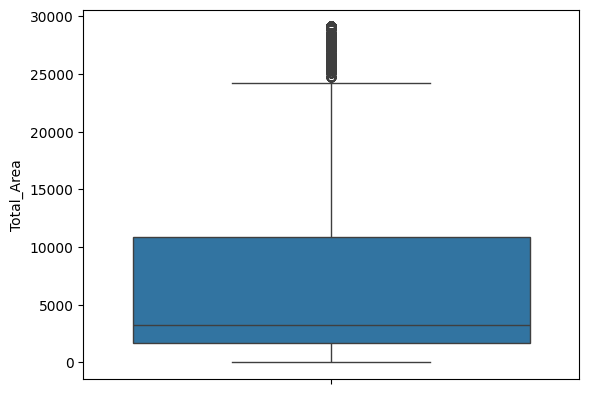

In [43]:
sns.boxplot(df['Total_Area'])

### Again applying the outlier technique on `price`

In [18]:
df.shape

(99010, 11)

In [20]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

125000.0
15500000.0
IQR is  15375000.0
upper limit  38562500.0
lower limit  -22937500.0
length of outliers on upper bound  3663
length of outliers on lower bound  0


In [21]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(95347, 11)


In [47]:
new_df['price'].skew()

np.float64(1.0500490629498755)

<Axes: ylabel='price'>

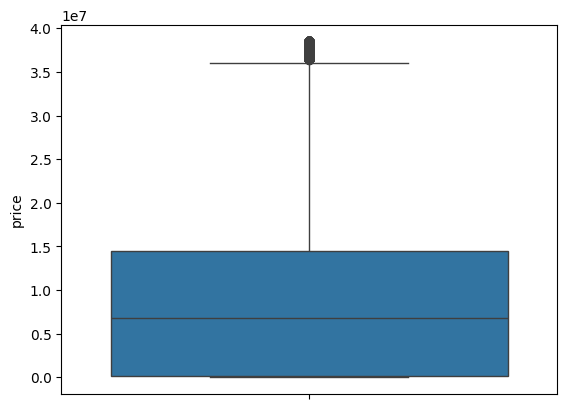

In [22]:
sns.boxplot(new_df['price'])

### again applying outlier technique on `Total_Area

In [23]:
new_df['Total_Area'].shape

(95347,)

In [24]:
# finding the IQR
q1 = new_df['Total_Area'].quantile(0.25)
q3 = new_df['Total_Area'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['Total_Area'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['Total_Area'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1633.506
11162.291
IQR is  9528.785
upper limit  25455.4685
lower limit  -12659.6715
length of outliers on upper bound  2775
length of outliers on lower bound  0


In [25]:
df = new_df[new_df['Total_Area'] < upper_limit]
print(df.shape)

(92572, 11)


In [52]:
df['Total_Area'].skew()

np.float64(1.2331723930379705)

<Axes: ylabel='Total_Area'>

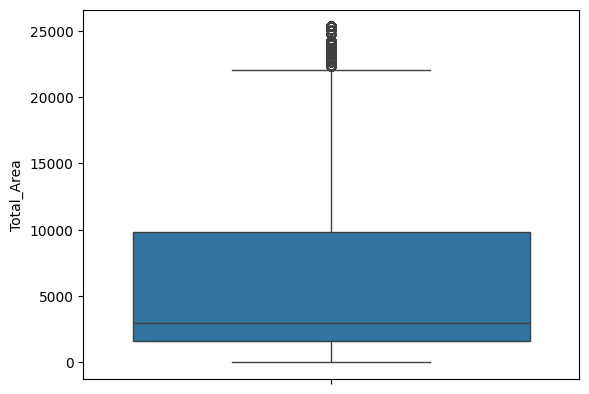

In [53]:
sns.boxplot(df['Total_Area'])

### Again implementing outlier method

In [26]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

110000.0
14000000.0
IQR is  13890000.0
upper limit  34835000.0
lower limit  -20725000.0
length of outliers on upper bound  1952
length of outliers on lower bound  0


In [27]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(90620, 11)


In [56]:
new_df['price'].skew()

np.float64(0.9378794055001446)

<Axes: ylabel='price'>

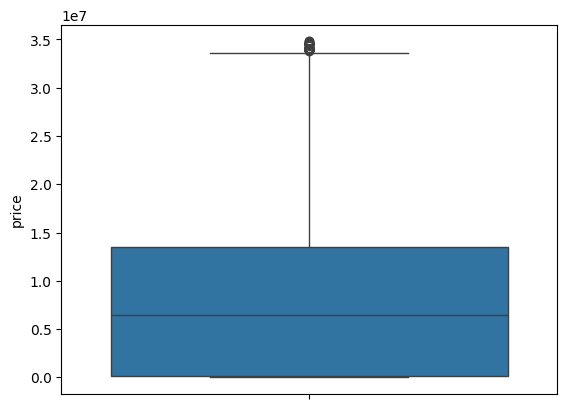

In [57]:
sns.boxplot(new_df['price'])

### On the `Total_Area`

In [28]:
# finding the IQR
q1 = new_df['Total_Area'].quantile(0.25)
q3 = new_df['Total_Area'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['Total_Area'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['Total_Area'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1633.506
10073.286999999998
IQR is  8439.780999999999
upper limit  22732.958499999997
lower limit  -11026.1655
length of outliers on upper bound  1618
length of outliers on lower bound  0


In [29]:
df = new_df[new_df['Total_Area'] < upper_limit]
print(df.shape)

(89002, 11)


<Axes: ylabel='Total_Area'>

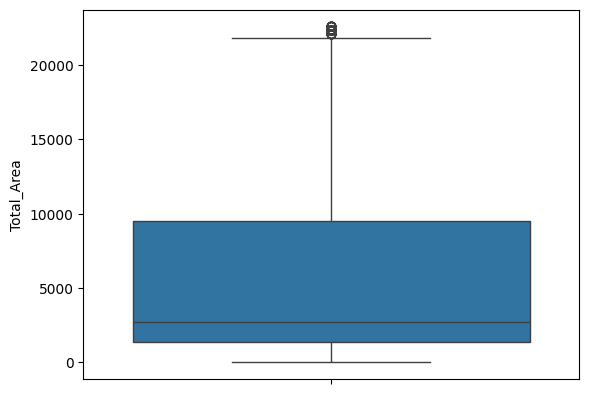

In [30]:
sns.boxplot(df['Total_Area'])

### again applying this technique 

In [31]:
df.shape

(89002, 11)

In [32]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

100000.0
13500000.0
IQR is  13400000.0
upper limit  33600000.0
lower limit  -20000000.0
length of outliers on upper bound  222
length of outliers on lower bound  0


In [33]:
new_df = df[df['price'] < upper_limit]
print(new_df.shape)

(88778, 11)


<Axes: ylabel='price'>

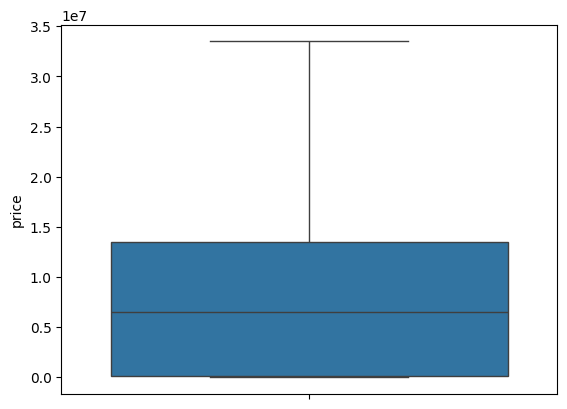

In [34]:
sns.boxplot(new_df['price'])

### again implementing on `Total_Adress`

In [35]:
# finding the IQR
q1 = new_df['Total_Area'].quantile(0.25)
q3 = new_df['Total_Area'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['Total_Area'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['Total_Area'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1361.255
9528.785
IQR is  8167.53
upper limit  21780.08
lower limit  -10890.04
length of outliers on upper bound  138
length of outliers on lower bound  0


In [36]:
df = new_df[new_df['Total_Area'] < upper_limit]
print(df.shape)

(88640, 11)


In [38]:
# finding the IQR
q1 = df['Total_Area'].quantile(0.25)
q3 = df['Total_Area'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['Total_Area'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['Total_Area'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1361.255
9528.785
IQR is  8167.53
upper limit  21780.08
lower limit  -10890.04
length of outliers on upper bound  0
length of outliers on lower bound  0


In [37]:
df.columns

Index(['property_type', 'price', 'location', 'city', 'province_name',
       'latitude', 'longitude', 'baths', 'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

### Now detect outliers in `latitude`

<Axes: ylabel='latitude'>

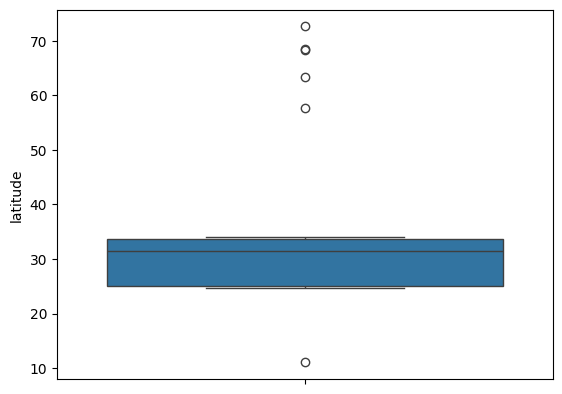

In [39]:
sns.boxplot(df['latitude'])

In [69]:
df['latitude'].skew()

np.float64(-0.4770366331564301)

In [40]:
# finding the IQR
q1 = df['latitude'].quantile(0.25)
q3 = df['latitude'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['latitude'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['latitude'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

24.949734
33.570792
IQR is  8.621057999999998
upper limit  46.50237899999999
lower limit  12.018147000000003
length of outliers on upper bound  5
length of outliers on lower bound  1


In [42]:
new_df = df[(df['latitude'] < upper_limit) & (df['latitude'] > lower_limit)]
print(new_df.shape)

(88634, 11)


<Axes: ylabel='latitude'>

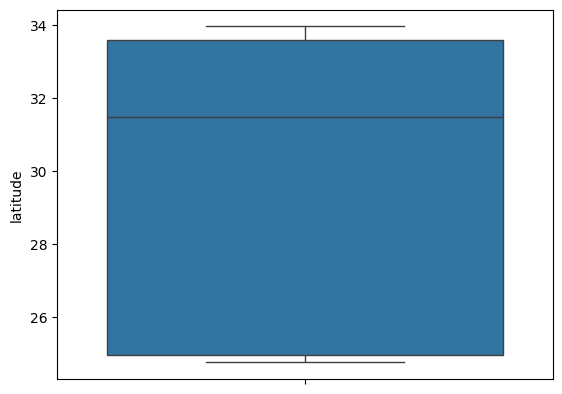

In [43]:
sns.boxplot(new_df['latitude'])

### Detecting and removig outliers in `longitude`

In [44]:
# finding the IQR
q1 = new_df['longitude'].quantile(0.25)
q3 = new_df['longitude'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['longitude'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['longitude'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

67.129162
73.218813
IQR is  6.0896510000000035
upper limit  82.3532895
lower limit  57.99468549999999
length of outliers on upper bound  0
length of outliers on lower bound  1


In [45]:
df = new_df[new_df['longitude'] > lower_limit]
print(df.shape)

(88633, 11)


### Detecting the outliers in `bedrooms`

In [46]:
# finding the IQR
q1 = df['bedrooms'].quantile(0.25)
q3 = df['bedrooms'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['bedrooms'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['bedrooms'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

2.0
4.0
IQR is  2.0
upper limit  7.0
lower limit  -1.0
length of outliers on upper bound  1359
length of outliers on lower bound  0


In [47]:
new_df = df[df['bedrooms'] < upper_limit]
print(new_df.shape)

(86099, 11)


<Axes: ylabel='bedrooms'>

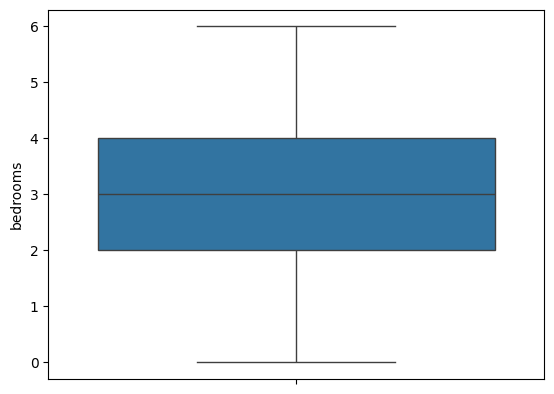

In [48]:
sns.boxplot(new_df['bedrooms'])

### outlier detection and removeing in `baths`

In [49]:
# finding the IQR
q1 = new_df['baths'].quantile(0.25)
q3 = new_df['baths'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = new_df[new_df['baths'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = new_df[new_df['baths'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

1.0
4.0
IQR is  3.0
upper limit  8.5
lower limit  -3.5
length of outliers on upper bound  73
length of outliers on lower bound  0


In [50]:
df = new_df[new_df['baths'] < upper_limit]
print(df.shape)

(86026, 11)


### Again applying on the `price`

In [51]:
# finding the IQR
q1 = df['price'].quantile(0.25)
q3 = df['price'].quantile(0.75)
print(q1)
print(q3)

iqr = q3-q1
print("IQR is ",iqr)
# define the upper and lower liit
upper_limit = q3 + 1.5 * iqr
lower_limit = q1 - 1.5 * iqr

print('upper limit ',upper_limit)
print('lower limit ',lower_limit)

outlier = df[df['price'] > upper_limit]
print("length of outliers on upper bound ",len(outlier))


outlier = df[df['price'] < lower_limit]
print("length of outliers on lower bound ",len(outlier))

90000.0
13000000.0
IQR is  12910000.0
upper limit  32365000.0
lower limit  -19275000.0
length of outliers on upper bound  634
length of outliers on lower bound  0


### capping

In [52]:
new_df = df.copy()
new_df['price'] = np.where(
    new_df['price'] > upper_limit,
    upper_limit,

np.where(
    new_df['price'] < lower_limit,
    lower_limit,
    new_df['price']
)
)
new_df.shape

(86026, 11)

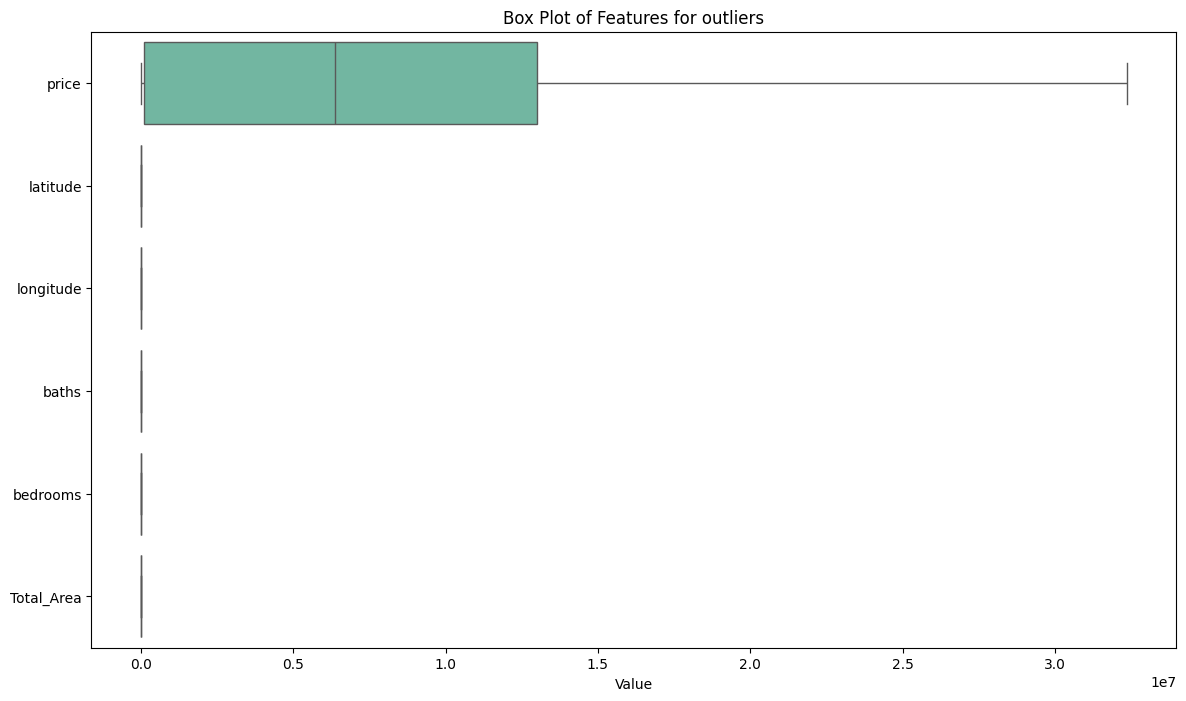

<Figure size 640x480 with 0 Axes>

In [58]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=new_df,orient='h',palette='Set2')
plt.title("Box Plot of Features for outliers")
plt.xlabel("Value")
plt.show()
plt.tight_layout()

In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 86026 entries, 0 to 168444
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  86026 non-null  object 
 1   price          86026 non-null  float64
 2   location       86026 non-null  object 
 3   city           86026 non-null  object 
 4   province_name  86026 non-null  object 
 5   latitude       86026 non-null  float64
 6   longitude      86026 non-null  float64
 7   baths          86026 non-null  int64  
 8   purpose        86026 non-null  object 
 9   bedrooms       86026 non-null  int64  
 10  Total_Area     86026 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 7.9+ MB


In [62]:
new_df.to_csv('Pakistan_Housing.csv')

In [111]:
df = pd.read_csv('Pakistan_Housing.csv')

In [112]:
df.shape

(86026, 12)

In [67]:
df.boxplot()

<Axes: >

In [113]:
df.drop(columns=['Unnamed: 0'],inplace=True)

### Applying one hot encodin on the categorical features

In [114]:
df.drop(columns=['location'],inplace=True)

In [72]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

In [71]:
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'latitude',
       'longitude', 'baths', 'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [53]:
df.purpose.value_counts(True)

purpose
For Sale    0.693186
For Rent    0.306814
Name: proportion, dtype: float64

In [54]:
df['property_type'].value_counts(True)

property_type
House            0.572373
Flat             0.265582
Upper Portion    0.089671
Lower Portion    0.061760
Room             0.006672
Penthouse        0.002360
Farm House       0.001581
Name: proportion, dtype: float64

In [115]:
df['property_type'] = df['property_type'].replace(['Room','Penthouse','Farm House'],'other')

In [116]:
df['property_type'] = df['property_type'].replace(['Upper Portion','Lower Portion'],'Portions')

In [117]:
df.property_type.value_counts(True)

property_type
House       0.572373
Flat        0.265582
Portions    0.151431
other       0.010613
Name: proportion, dtype: float64

In [118]:
df.province_name.value_counts(True)

province_name
Punjab               0.437077
Sindh                0.338665
Islamabad Capital    0.224258
Name: proportion, dtype: float64

In [119]:
df.city.value_counts(True)

city
Karachi       0.338665
Lahore        0.243636
Islamabad     0.224258
Rawalpindi    0.145851
Faisalabad    0.047590
Name: proportion, dtype: float64

In [59]:
df.columns

Index(['property_type', 'price', 'city', 'province_name', 'latitude',
       'longitude', 'baths', 'purpose', 'bedrooms', 'Total_Area'],
      dtype='object')

In [120]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86026 entries, 0 to 86025
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  86026 non-null  object 
 1   price          86026 non-null  float64
 2   city           86026 non-null  object 
 3   province_name  86026 non-null  object 
 4   latitude       86026 non-null  float64
 5   longitude      86026 non-null  float64
 6   baths          86026 non-null  int64  
 7   purpose        86026 non-null  object 
 8   bedrooms       86026 non-null  int64  
 9   Total_Area     86026 non-null  float64
dtypes: float64(4), int64(2), object(4)
memory usage: 6.6+ MB


In [121]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

trf1 = ColumnTransformer([
    ('encode',OneHotEncoder(handle_unknown='ignore'), [0, 2, 3, 7])
], remainder='passthrough')
encoded_array = trf1.fit_transform(df)

# # Convert the transformed array into a DataFrame
encoded_df = pd.DataFrame(encoded_array, columns=trf1.get_feature_names_out())

encoded_df.head()
# encoded_df = pd.DataFrame(encoded_df,columns=trf1.get_feature_names_out)
# #df.head()

,encode__property_type_Flat,encode__property_type_House,encode__property_type_Portions,encode__property_type_other,encode__city_Faisalabad,encode__city_Islamabad,encode__city_Karachi,encode__city_Lahore,encode__city_Rawalpindi,encode__province_name_Islamabad Capital,encode__province_name_Punjab,encode__province_name_Sindh,encode__purpose_For Rent,encode__purpose_For Sale,remainder__price,remainder__latitude,remainder__longitude,remainder__baths,remainder__bedrooms,remainder__Total_Area
0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,10000000.0,33.679890,73.012640,2.0,2.0,1089.004
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,6900000.0,33.700993,72.971492,3.0,3.0,15246.056
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,16500000.0,33.631486,72.926559,6.0,5.0,2178.008
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7000000.0,33.492591,73.301339,3.0,3.0,2178.008
4,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,7800000.0,33.698244,72.984238,2.0,2.0,16879.562


In [89]:
encoded_df.sample(10)

,encode__property_type_Flat,encode__property_type_House,encode__property_type_Portions,encode__property_type_other,encode__city_Faisalabad,encode__city_Islamabad,encode__city_Karachi,encode__city_Lahore,encode__city_Rawalpindi,encode__province_name_Islamabad Capital,encode__province_name_Punjab,encode__province_name_Sindh,encode__purpose_For Rent,encode__purpose_For Sale,remainder__price,remainder__latitude,remainder__longitude,remainder__baths,remainder__bedrooms,remainder__Total_Area
37849,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3800000.0,33.549693,73.130536,1.0,1.0,6806.275
54023,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,26000000.0,24.938913,67.140593,0.0,0.0,2178.008
41908,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,14000000.0,24.911038,67.141385,4.0,4.0,13068.048
75742,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,8500000.0,31.502166,74.333439,6.0,6.0,1361.255
83046,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,14000000.0,33.543004,73.067576,4.0,4.0,2722.510
71105,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,2500000.0,25.017951,67.136393,2.0,2.0,9256.534
18034,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,19000.0,24.974660,67.054667,0.0,0.0,13068.048
57330,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,10000.0,33.666470,73.153934,1.0,1.0,1089.004
38073,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,5600000.0,31.450925,74.354287,3.0,4.0,816.753
70728,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,3000000.0,33.589320,72.979099,2.0,2.0,816.753


In [87]:
encoded_df.shape

(86026, 20)

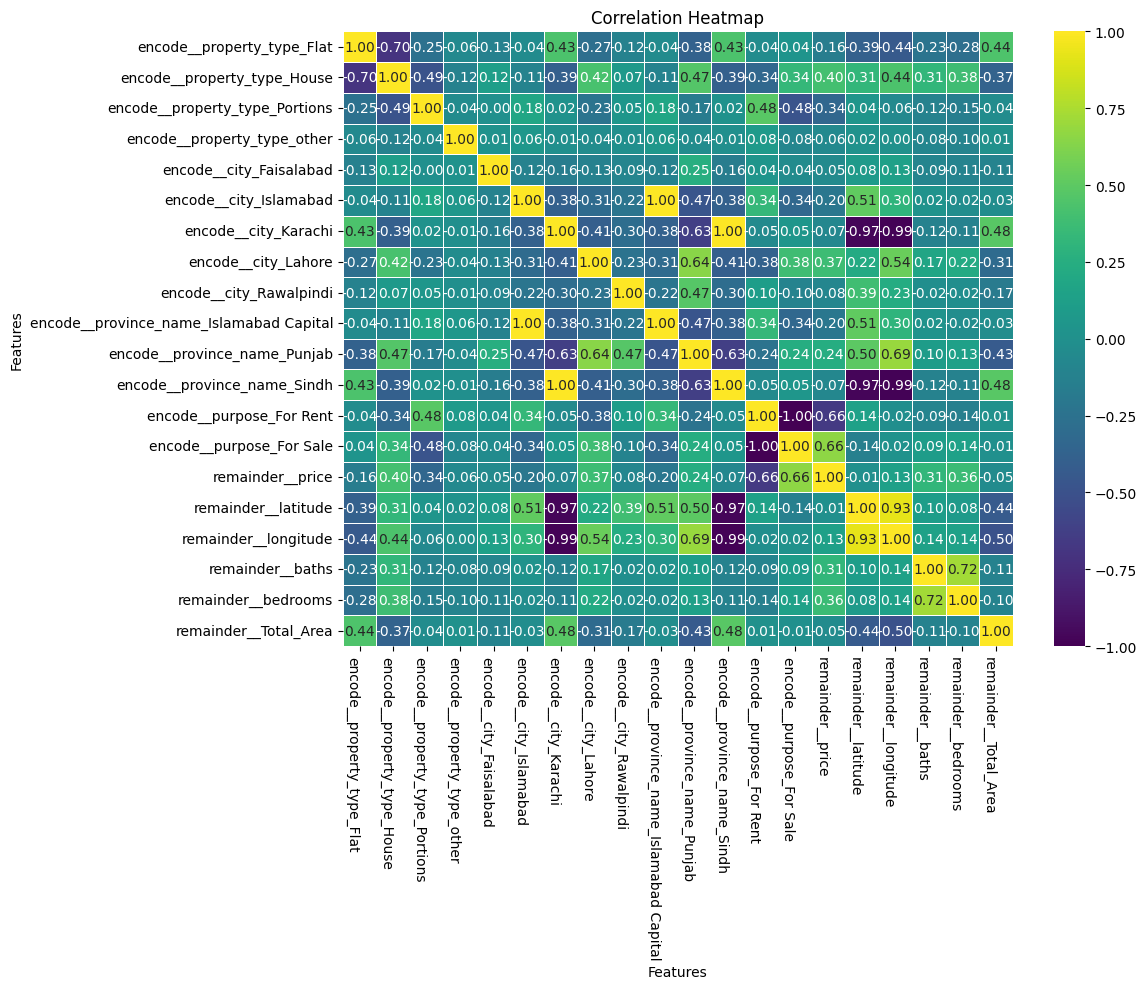

In [122]:
# Compute the correlation matrix
corr = encoded_df.corr()

# Create a new figure for plotting
plt.figure(figsize=(12, 10))  # Set the figure size

# Create the heatmap with Seaborn
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f', linewidths=0.5)  # Customize the plot

# Add labels and title
plt.xlabel('Features')
plt.ylabel('Features')
plt.title('Correlation Heatmap')

# Rotate x-axis labels for better readability
plt.xticks(rotation=-90, ha='right')

# Show the plot
plt.tight_layout()
plt.show()

In [123]:
encoded_df.drop(columns=['remainder__latitude'],inplace=True)

In [124]:
encoded_df.shape

(86026, 19)

In [ ]:
encoded_df.to_csv("Pakistan.csv")

##### Steps to apply regression model
- Splitting the data
- Fit the model
- Check the prediction
- Check the ccuracy score

In [125]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.preprocessing import StandardScaler,MinMaxScaler
import sklearn.metrics as metrics

## Splittine the data:
- train_data = 70%
- test_data = 20%

In [127]:
x=encoded_df.drop('remainder__price',axis=1)
y=encoded_df['remainder__price']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [128]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((68820, 18), (17206, 18), (68820,), (17206,))

In [129]:
x_train.head()

,encode__property_type_Flat,encode__property_type_House,encode__property_type_Portions,encode__property_type_other,encode__city_Faisalabad,encode__city_Islamabad,encode__city_Karachi,encode__city_Lahore,encode__city_Rawalpindi,encode__province_name_Islamabad Capital,encode__province_name_Punjab,encode__province_name_Sindh,encode__purpose_For Rent,encode__purpose_For Sale,remainder__longitude,remainder__baths,remainder__bedrooms,remainder__Total_Area
56631,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,74.252458,3.0,3.0,1361.255
6437,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,67.136153,2.0,2.0,15790.558
15506,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,72.929034,3.0,3.0,1905.757
7454,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,73.074160,6.0,6.0,3267.012
59626,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,73.129443,0.0,0.0,9801.036


### Scalling the data

In [130]:
from sklearn.preprocessing import StandardScaler

In [131]:
#training and testing sets
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [101]:
x_train = pd.DataFrame(x_train,columns=x.columns)
x_train.head()

,encode__property_type_Flat,encode__property_type_House,encode__property_type_Portions,encode__property_type_other,encode__city_Faisalabad,encode__city_Islamabad,encode__city_Karachi,encode__city_Lahore,encode__city_Rawalpindi,encode__province_name_Islamabad Capital,encode__province_name_Punjab,encode__province_name_Sindh,encode__purpose_For Rent,encode__purpose_For Sale,remainder__longitude,remainder__baths,remainder__bedrooms,remainder__Total_Area
0,1.662062,-1.158259,-0.421596,-0.102327,-0.224362,-0.539738,1.40062,-0.567570,-0.412128,-0.539738,-0.880597,1.40062,-0.664391,0.664391,-1.390952,-0.818004,-1.784475,-0.964633
1,-0.601662,0.863365,-0.421596,-0.102327,-0.224362,-0.539738,-0.71397,-0.567570,2.426431,-0.539738,1.135593,-0.71397,-0.664391,0.664391,0.551055,-0.301624,-1.157462,0.536863
2,-0.601662,0.863365,-0.421596,-0.102327,-0.224362,-0.539738,-0.71397,-0.567570,2.426431,-0.539738,1.135593,-0.71397,-0.664391,0.664391,0.551054,-0.301624,-0.530449,-0.864533
3,-0.601662,0.863365,-0.421596,-0.102327,-0.224362,-0.539738,1.40062,-0.567570,-0.412128,-0.539738,-0.880597,1.40062,-0.664391,0.664391,-1.314970,0.214757,0.096564,-0.814483
4,-0.601662,0.863365,-0.421596,-0.102327,-0.224362,-0.539738,-0.71397,1.761897,-0.412128,-0.539738,1.135593,-0.71397,-0.664391,0.664391,0.937446,0.731138,0.723578,-0.864533


## RandomForestRegressor

In [137]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
model=RandomForestRegressor(n_estimators=300,
                            max_depth=50,
                            min_samples_split=5,
                            min_samples_leaf=3,
                            max_features='sqrt',
                            bootstrap=True)
model.fit(x_train,y_train)
y_pred_rf=model.predict(x_test)
mse=mean_squared_error(y_pred_rf,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred_rf,y_test)
mae = mean_absolute_error(y_pred_rf,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  9129785007573.365
r2_score is :  0.8320693969176447
mean_absolute_error is :  1739048.909867826


In [138]:
from sklearn.model_selection import cross_val_score

# Cross-validation
cv_mse = cross_val_score(model, x_train, y_train, scoring='neg_mean_squared_error', cv=5)
print("Mean Cross-Validation MSE: ", -cv_mse.mean())


Mean Cross-Validation MSE:  9515236804759.037


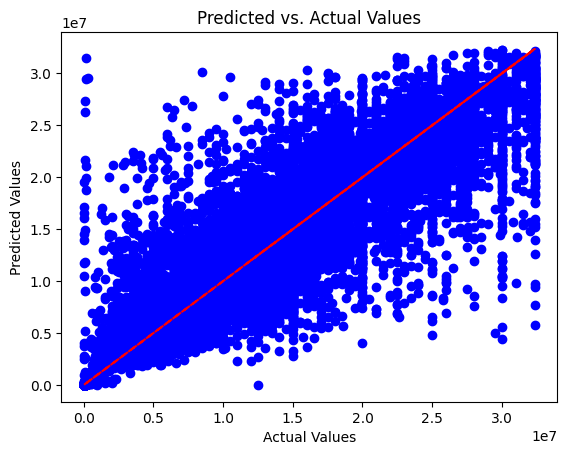

In [107]:
# 2. Predicted vs. Actual Values (evaluates model fit visually)
plt.scatter(y_test, y_pred_rf, color='blue')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Predicted vs. Actual Values')
plt.plot(y_test, y_test, color='red', linestyle='--')  # Perfect prediction line
plt.show()

### GradientBoostingRegressor

In [133]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  14095691796188.273
r2_score is :  0.7154011723041942
mean_absolute_error is :  2402465.852701292


## DecisionTreeRegressor

In [134]:
from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse=mean_squared_error(y_pred,y_test)
# Random Forest Regression acuuracy with test size
score = r2_score(y_pred,y_test)
mae = mean_absolute_error(y_pred,y_test)

print("mean squared error is  : ",mse)
print("r2_score is : ",score)
print("mean_absolute_error is : ",mae)

mean squared error is  :  12820235149386.262
r2_score is :  0.8088937261626932
mean_absolute_error is :  1856497.0650664289


In [220]:
print(r2_score(y_test,y_pred_rf))

0.9212762857064415


In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
import joblib
import numpy as np
import pickle

# Save the model to a file using joblib
decision_tree_regressor = DecisionTreeRegressor()

decision_tree_regressor.fit(x_train,y_train)




# Model Loading code

In [ ]:
# # Save the model using pickle
with open('decision_tree_for_house_price.pkl', 'wb') as f:
    pickle.dump(decision_tree_regressor, f)


# # Load your trained model
with open('decision_tree_for_house_price.pkl', 'rb') as f:
    model = pickle.load(f)

# # Now `model` will have the `predict()` method

### DecisionTreeRegressor

In [221]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
rf_regressor=DecisionTreeRegressor().fit(x_train,y_train)
y_pred_rf=rf_regressor.predict(x_test)
RFr=mean_squared_error(y_pred_rf,y_test)
# Random Forest Regression acuuracy with test size
print("Random Forest Regressor : ",RFr)

Random Forest Regressor :  7431296497368.613


In [222]:
print(r2_score(y_test,y_pred_rf))

0.8874390818460489
